In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("Iris.csv")

In [3]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [27]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

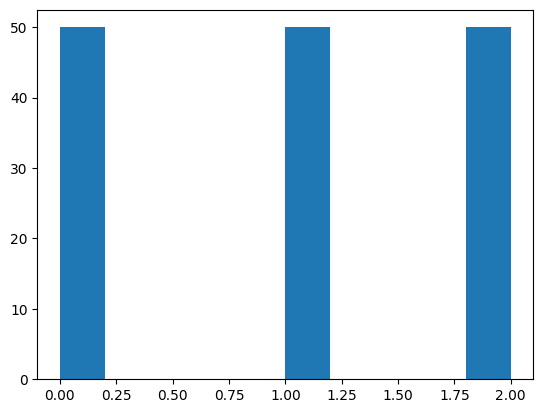

In [30]:
plt.hist(df.Species)

In [4]:

#X=df.drop(df["Species"], axis=0 ).values
Y=df.Species.values
X=df.iloc[:,:3].values



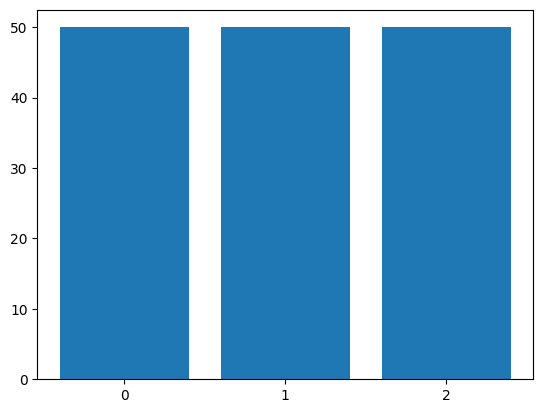

In [5]:
# Visualiser les nombres d'observations dans chaque à travers un diagramme en bar
plt.bar(np.unique(df.Species), df['Species'].value_counts())
plt.xticks(np.unique(df.Species))
plt.show()

In [6]:
df.Species

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
lr = StandardScaler()
X=lr. fit_transform(X)
X[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 ],
       [-1.14301691, -0.1249576 , -1.3412724 ],
       [-1.38535265,  0.33784833, -1.39813811],
       [-1.50652052,  0.10644536, -1.2844067 ],
       [-1.02184904,  1.26346019, -1.3412724 ]])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size=0.2, random_state=4)

In [10]:
X_train[0:5]

array([[-0.53717756, -0.1249576 ,  0.42156442],
       [-1.50652052,  0.33784833, -1.3412724 ],
       [ 1.03800476, -1.28197243,  1.16081857],
       [-1.14301691, -0.1249576 , -1.3412724 ],
       [-1.02184904, -1.74477836, -0.26082403]])

In [11]:
# Afficher les dimensions X_test, y_test
X_test.shape,Y_test.shape

((30, 3), (30,))

In [12]:
X_train.shape , Y_test.shape

((120, 3), (30,))

In [13]:
from sklearn.neighbors import KNeighborsClassifier

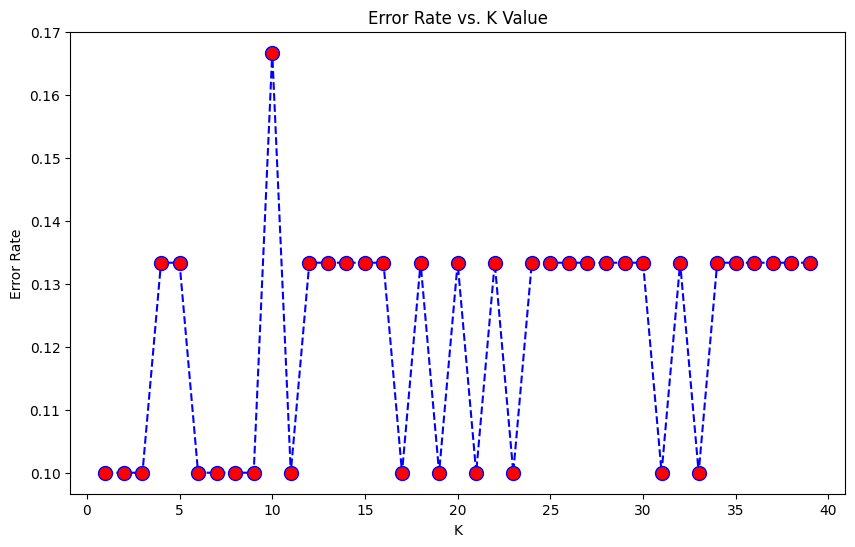

In [14]:
from utils import K_choice
# Trouver le k optimal
K_choice(X_train,Y_train,X_test,Y_test)

In [16]:
pip install  Utils

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
k = 20
# Instantier le modèle
neigh =KNeighborsClassifier(n_neighbors = k)
# Entrainer le modèle
neigh.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=20)

In [23]:
# Prédire les labels des 3 premiers individus de X_test
pred_3=neigh.predict(X_test[0:3])
pred_3

array([2, 0, 2], dtype=int64)

In [24]:
# Utiliser la fonction predict pour prédire les labels des données test
ypred = neigh.predict(X_test)

In [25]:
ypred

array([2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 2,
       1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [26]:
# Evaluer les performances du modèle 
from sklearn.metrics import accuracy_score
acc_KNN = accuracy_score(ypred,Y_test)
acc_KNN 

0.8666666666666667